# Glauber on infinite random $k$-regular graph
Compute magnetization in the thermodynamic limit $N\to\infty$.

Reproduce the results in *Barthel et. al*, [Matrix product algorithm for stochastic dynamics on networks applied to nonequilibrium Glauber dynamics](https://doi.org/10.1103/PhysRevE.97.010104) for $T=50, J=β=1, h=0, m⁰ = 0.5, k=3$.

In [7]:
using MatrixProductBP, MatrixProductBP.Models
using Graphs, IndexedGraphs, Plots, LaTeXStrings
import ProgressMeter; ProgressMeter.ijulia_behavior(:clear);

┌ Info: Precompiling MatrixProductBP [3d39929c-b583-45fa-b331-3f50b693a38a]
└ @ Base loading.jl:1662


In [47]:
T = 30         # final time
k = 3          # degree
m⁰ = 0.5       # magnetization at time zero

β = 1.0
J = 1.0
h = 0.0;

In [48]:
wᵢ = fill(HomogeneousGlauberFactor(J, h, β), T+1)
ϕᵢ = [ t == 0 ? [(1+m⁰)/2, (1-m⁰)/2] : ones(2) for t in 0:T]
bp = mpbp_infinite_graph(k, wᵢ, 2, ϕᵢ)
cb = CB_BP(bp);

In [49]:
matrix_sizes = [5, 15]
maxiters = fill(50, length(matrix_sizes))
iters = zeros(Int, length(maxiters))
tol = 1e-4
for i in eachindex(maxiters)
    iters[i], _ = iterate!(bp; maxiter=maxiters[i], svd_trunc=TruncBond(matrix_sizes[i]), cb, tol)
end

Running MPBP: iter 28 	 Time: 0:11:46
  Δ:                0.013326845025254164
  SVD Matrix size:  15

LoadError: TaskFailedException

[91m    nested task error: [39mInterruptException:
    Stacktrace:
      [1] [0m[1mArray[22m
    [90m    @ [39m[90m./[39m[90m[4mboot.jl:459[24m[39m[90m [inlined][39m
      [2] [0m[1mArray[22m
    [90m    @ [39m[90m./[39m[90m[4mboot.jl:468[24m[39m[90m [inlined][39m
      [3] [0m[1msimilar[22m
    [90m    @ [39m[90m./[39m[90m[4marray.jl:378[24m[39m[90m [inlined][39m
      [4] [0m[1msimilar[22m
    [90m    @ [39m[90m./[39m[90m[4mabstractarray.jl:795[24m[39m[90m [inlined][39m
      [5] [0m[1mgetindex[22m
    [90m    @ [39m[90m./[39m[90m[4marray.jl:932[24m[39m[90m [inlined][39m
      [6] [0m[1m_debug_svd[22m[0m[1m([22m[90mM[39m::[0mMatrix[90m{Float64}[39m, [90mU[39m::[0mMatrix[90m{Float64}[39m, [90mλ[39m::[0mVector[90m{Float64}[39m, [90mV[39m::[0mLinearAlgebra.Adjoint[90m{Float64, Matrix{Float64}}[39m, [90mmprime[39m::[0mInt64[0m[1m)[22m
    [90m    @ [39m[35mMatrixProductBP.MPEMs[39m [90m~/MatrixProductBP/src/MPEMs/[39m[90m[4msvd_trunc.jl:9[24m[39m
      [7] [0m[1m(::TruncThresh{Float64})[22m[0m[1m([22m[90mM[39m::[0mMatrix[90m{Float64}[39m[0m[1m)[22m
    [90m    @ [39m[35mMatrixProductBP.MPEMs[39m [90m~/MatrixProductBP/src/MPEMs/[39m[90m[4msvd_trunc.jl:25[24m[39m
      [8] [0m[1msweep_LtoR![22m[0m[1m([22m[90mC[39m::[0mMPEM2[90m{Float64}[39m; [90msvd_trunc[39m::[0mTruncThresh[90m{Float64}[39m[0m[1m)[22m
    [90m    @ [39m[35mMatrixProductBP.MPEMs[39m [90m~/MatrixProductBP/src/MPEMs/[39m[90m[4mmptrain.jl:97[24m[39m
      [9] [0m[1m#compress!#34[22m
    [90m    @ [39m[90m~/MatrixProductBP/src/MPEMs/[39m[90m[4mmptrain.jl:109[24m[39m[90m [inlined][39m
     [10] [0m[1m(::MatrixProductBP.Models.var"#op#29"{HomogeneousGlauberFactor{Float64}, Vector{HomogeneousGlauberFactor{Float64}}, TruncBond})[22m[0m[1m([22m::[0mTuple[90m{MPEM2{Float64}, Float64, Int64}[39m, ::[0mTuple[90m{MPEM2{Float64}, Float64, Int64}[39m[0m[1m)[22m
    [90m    @ [39m[35mMatrixProductBP.Models[39m [90m~/MatrixProductBP/src/Models/[39m[90m[4mrecursive_bp_factor.jl:100[24m[39m
     [11] [0m[1m_accumulate1![22m[0m[1m([22m[90mop[39m::[0mMatrixProductBP.Models.var"#op#29"[90m{HomogeneousGlauberFactor{Float64}, Vector{HomogeneousGlauberFactor{Float64}}, TruncBond}[39m, [90mB[39m::[0mVector[90m{Tuple{MPEM2{Float64}, Float64, Int64}}[39m, [90mv1[39m::[0mTuple[90m{MPEM2{Float64}, Float64, Int64}[39m, [90mA[39m::[0mVector[90m{Tuple{MPEM2{Float64}, Float64, Int64}}[39m, [90mdim[39m::[0mInt64[0m[1m)[22m
    [90m    @ [39m[90mBase[39m [90m./[39m[90m[4maccumulate.jl:431[24m[39m
     [12] [0m[1m_accumulate![22m
    [90m    @ [39m[90m./[39m[90m[4maccumulate.jl:355[24m[39m[90m [inlined][39m
     [13] [0m[1m#accumulate!#838[22m
    [90m    @ [39m[90m./[39m[90m[4maccumulate.jl:340[24m[39m[90m [inlined][39m
     [14] [0m[1maccumulate![22m
    [90m    @ [39m[90m./[39m[90m[4maccumulate.jl:337[24m[39m[90m [inlined][39m
     [15] [0m[1mcavity![22m[0m[1m([22m[90mdest[39m::[0mVector[90m{Tuple{MPEM2{Float64}, Float64, Int64}}[39m, [90msource[39m::[0mVector[90m{Tuple{MPEM2{Float64}, Float64, Int64}}[39m, [90mop[39m::[0mMatrixProductBP.Models.var"#op#29"[90m{HomogeneousGlauberFactor{Float64}, Vector{HomogeneousGlauberFactor{Float64}}, TruncBond}[39m, [90minit[39m::[0mTuple[90m{MPEM2{Float64}, Float64, Int64}[39m[0m[1m)[22m
    [90m    @ [39m[36mCavityTools[39m [90m~/.julia/packages/CavityTools/WjGpE/src/[39m[90m[4mcavity.jl:8[24m[39m
     [16] [0m[1mcavity[22m[0m[1m([22m[90msource[39m::[0mVector[90m{Tuple{MPEM2{Float64}, Float64, Int64}}[39m, [90mop[39m::[0mFunction, [90minit[39m::[0mTuple[90m{MPEM2{Float64}, Float64, Int64}[39m[0m[1m)[22m
    [90m    @ [39m[36mCavityTools[39m [90m~/.julia/packages/CavityTools/WjGpE/src/[39m[90m[4mcavity.jl:21[24m[39m
     [17] [0m[1mcompute_prob_ys[22m[0m[1m([22m[90mwᵢ[39m::[0mVector[90m{HomogeneousGlauberFactor{Float64}}[39m, [90mqi[39m::[0mInt64, [90mμin[39m::[0mVector[90m{MPEM2{Float64}}[39m, [90mψout[39m::[0mVector[90m{Vector{Matrix{Float64}}}[39m, [90mT[39m::[0mInt64, [90msvd_trunc[39m::[0mTruncBond[0m[1m)[22m
    [90m    @ [39m[35mMatrixProductBP.Models[39m [90m~/MatrixProductBP/src/Models/[39m[90m[4mrecursive_bp_factor.jl:106[24m[39m
     [18] [0m[1monebpiter![22m[0m[1m([22m[90mbp[39m::[0mMPBP[90m{MatrixProductBP.InfiniteRegularGraph, Float64, Vector{HomogeneousGlauberFactor{Float64}}}[39m, [90mi[39m::[0mInt64, ::[0mType[90m{HomogeneousGlauberFactor{Float64}}[39m; [90msvd_trunc[39m::[0mTruncBond, [90mdamp[39m::[0mFloat64[0m[1m)[22m
    [90m    @ [39m[35mMatrixProductBP.Models[39m [90m~/MatrixProductBP/src/Models/[39m[90m[4mrecursive_bp_factor.jl:119[24m[39m
     [19] [0m[1mmacro expansion[22m
    [90m    @ [39m[90m~/MatrixProductBP/src/[39m[90m[4mmpbp.jl:178[24m[39m[90m [inlined][39m
     [20] [0m[1m(::MatrixProductBP.var"#191#threadsfor_fun#85"{MatrixProductBP.var"#191#threadsfor_fun#84#86"{TruncBond, Float64, MPBP{MatrixProductBP.InfiniteRegularGraph, Float64, Vector{HomogeneousGlauberFactor{Float64}}}, Vector{Int64}}})[22m[0m[1m([22m[90mtid[39m::[0mInt64; [90monethread[39m::[0mBool[0m[1m)[22m
    [90m    @ [39m[35mMatrixProductBP[39m [90m./[39m[90m[4mthreadingconstructs.jl:84[24m[39m
     [21] [0m[1m#191#threadsfor_fun[22m
    [90m    @ [39m[90m./[39m[90m[4mthreadingconstructs.jl:51[24m[39m[90m [inlined][39m
     [22] [0m[1m(::Base.Threads.var"#1#2"{MatrixProductBP.var"#191#threadsfor_fun#85"{MatrixProductBP.var"#191#threadsfor_fun#84#86"{TruncBond, Float64, MPBP{MatrixProductBP.InfiniteRegularGraph, Float64, Vector{HomogeneousGlauberFactor{Float64}}}, Vector{Int64}}}, Int64})[22m[0m[1m([22m[0m[1m)[22m
    [90m    @ [39m[90mBase.Threads[39m [90m./[39m[90m[4mthreadingconstructs.jl:30[24m[39m

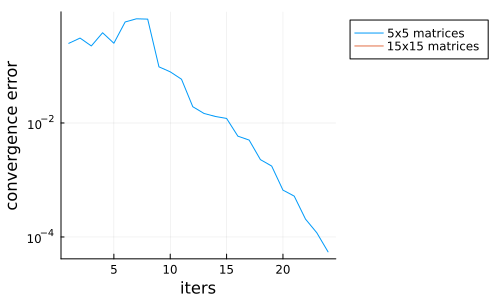

In [50]:
iters_cum = cumsum(iters)
inds = 1:iters_cum[1]
pl = plot(inds, cb.Δs[inds], label="$(matrix_sizes[1])x$(matrix_sizes[1]) matrices")
for i in 2:length(iters)
    inds = iters_cum[i-1]:iters_cum[i]
   plot!(pl, inds, cb.Δs[inds], label="$(matrix_sizes[i])x$(matrix_sizes[i]) matrices")
end
plot(pl, ylabel="convergence error", xlabel="iters", yaxis=:log10, size=(500,300), legend=:outertopright)

In [16]:
spin(x, i) = 3-2x
spin(x) = spin(x, 0)
m = only(means(spin, bp));

In [43]:
 pb = pair_beliefs_as_mpem(bp)[1][1]
compress!(pb; svd_trunc=TruncBond(15))
mtu = marginals_tu(pb; Δtmax=1);

In [44]:
pb = pair_beliefs_as_mpem(bp)[1][1]
# mtu = marginals_tu(pb)
r = [expectation(spin, dropdims(sum(sum(mtu[t,t+1], dims=2), dims=3); dims=(2,3))) 
    for t in 1:T];

In [45]:
m_eq, r_eq, e_eq = equilibrium_observables(RandomRegular(k), J; β, h)

(m = 0.9917570032084977, r = 0.9861516673634358, e = -1.4792275010451537)

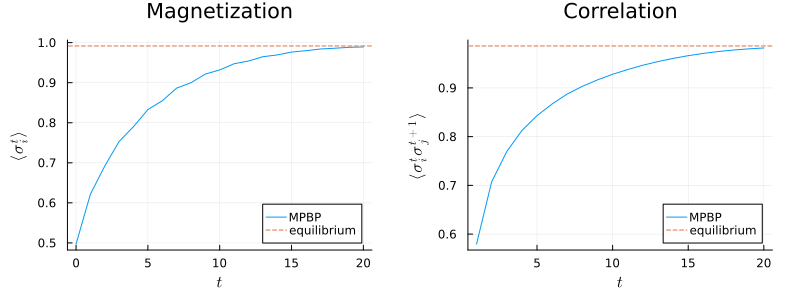

In [46]:
pl_m = plot(0:T, m, xlabel=L"t", ylabel=L"\langle \sigma_i^t \rangle", msc=:auto,
    size=(500,300), xticks=0:5:T, ms=2, label="MPBP", legend=:bottomright)
hline!(pl_m, [m_eq], label="equilibrium", ls=:dash, title="Magnetization")

pl_r = plot(1:T, r, xlabel=L"t", ylabel=L"\langle \sigma_i^t\sigma_j^{t+1} \rangle", msc=:auto,
    size=(500,300), xticks=0:5:T, ms=2, label="MPBP", legend=:bottomright)
hline!(pl_r, [r_eq], label="equilibrium", ls=:dash, title="Correlation")

plot(pl_m, pl_r, size=(800,300), margin=5Plots.mm)